In [207]:
import math
from sympy import *
init_printing(use_unicode=True)
x =symbols('x')

In [208]:
from icecream import ic
import random

In [209]:
def getPlots(funcsWithPlotParameters, title, rangeX=(-5, 5)):
    plots = plot(show=False, xlabel='x', ylabel='y', legend=True, title=title, ylim=(-10, 10))
    for fp in funcsWithPlotParameters:
        func = fp.get('func', None)
        if func:
            color = fp.get('color', 'blue')
            label = fp.get('label', '')
            p = plot(func, (x, rangeX[0], rangeX[1]), show=False, line_color=color, label=label, ylim=(-10, 10))
            plots.append(p[0])
    plots.show()
    return plots

def getTaylorSeriesWithComponents(func, Nn, x0):
    skladowe = []
    szeregTaylora = 0
    for n in range(0, Nn+1):
        pochodna = diff(func, x, n)
        pochodnaX0 = pochodna.subs(x, x0)
        skladowa = pochodnaX0 / math.factorial(n) * ((x - x0)**n)
        # ic(pochodna, pochodnaX0, skladowa)
        skladowe.append(skladowa)
        szeregTaylora += skladowa
    return szeregTaylora, skladowe


In [210]:
def t1(func, Nn, x0):
    ic(func, Nn, x0)
    # skladowe = []
    # szeregTaylora = 0
    # for n in range(0, Nn+1):
    #     pochodna = diff(func, x, n)
    #     pochodnaX0 = pochodna.subs(x, x0)
    #     skladowa = pochodnaX0 / math.factorial(n) * ((x - x0)**n)
    #     # ic(pochodna, pochodnaX0, skladowa)
    #     skladowe.append(skladowa)
    #     szeregTaylora += skladowa
    szeregTaylora, skladowe = getTaylorSeriesWithComponents(func, Nn, x0)
    # Pierwszy układ wykresów - wykres funkcji i jej N-tego przybliżenia
    wykresFunkcjiOrazTaylora = getPlots([{'func':func, 'color':"blue", 'label':"f(x)"},
                                     {'func':szeregTaylora, 'color':"red", 'label':"taylor"}],
                                    "Wykres funkcji i jej N-tego przyblizenia", (x0-5, x0+5))
    # Drugi układ wykresów - wykres tailora i wszystkich składowych
    taylorPlotData = [{'func': szeregTaylora, 'color': "red", 'label': "taylor"}]  # Dodanie danych wykresu Taylora
    for i, skladowa in enumerate(skladowe):
        if skladowa:
            randomColor = '#' + ''.join([random.choice('123456789ABCDE') for j in range(6)])
            taylorPlotData.extend([{'func': skladowa, 'color': randomColor, 'label': f"a{i}"}]) # Dodanie danych wykresow skladowych
    wykresTayloraOrazSkladowych = getPlots(taylorPlotData, "Wykres taylora oraz wykresy jego skladowych", (x0-5, x0+5))
    return [s for s in skladowe if s != 0], szeregTaylora, wykresFunkcjiOrazTaylora, None#wykresTayloraOrazSkladowych

ic| func: exp(x), Nn: 5, x0: 0


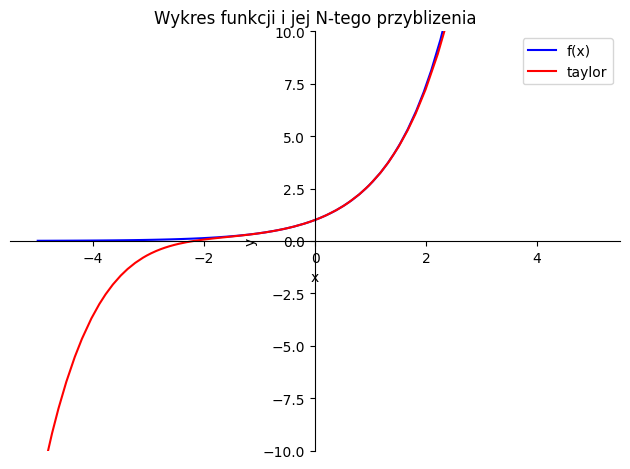

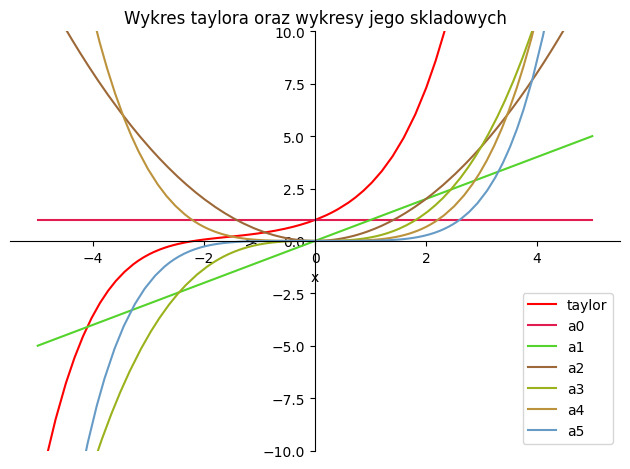

[1, x, x**2/2, x**3/6, x**4/24, x**5/120]
x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


In [211]:
# t1Func = sin(x)
t1Func = E**x
# t1Func = 1/x
t1N = 5
t1X0 = 0
# t1X0 = 1
w1, w2, w3, w4 = t1(t1Func, t1N, t1X0)
print(w1)
print(w2)

In [212]:
def t2(func, N1, N2, x0):
    ic(func, N1, N2, x0)
    return None, None

In [213]:
t2Func = sin(x)
t2N1 = 3
t2N2 = 5
t2X0 = 0
w1, w2 = t2(t2Func, t2N1, t2N2, t2X0)

ic| func: sin(x), N1: 3, N2: 5, x0: 0
